In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
dimond=sns.load_dataset('diamonds')

In [6]:
dimond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\Muhammad junaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

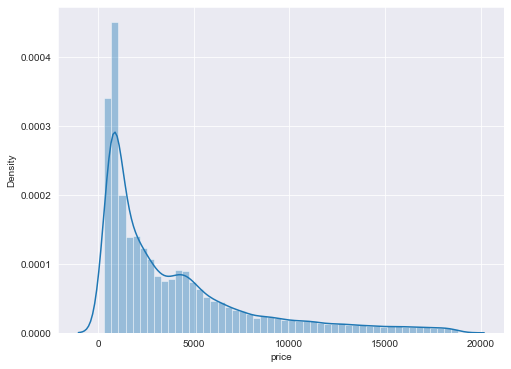

In [7]:
sns.distplot(dimond['price'])

# 
The histogram for the price column shows that our dataset is positively skewed.
We can use discretization on this type of data distribution. Let’s now find the total price 
range by subtracting the minimum price from the maximum price.

In [10]:
rang=dimond['price'].max()-dimond['price'].min()

In [11]:
rang

18497

In [12]:
# The price range is 18497. We will create 10 equal width intervals. To find the length or width of
#each interval, we simply need to divide the price by the number of intervals.
#The output shows the interval length for each of the 10 intervals.
width=rang/10

1849.7

In [16]:
#The minimum price will be rounded off to the floor, while the maximum price will be rounded off to 
#the ceiling. The price will be rounded off to the nearest integer value. 
lower_interval=int(np.floor(dimond['price'].min()))
upper_interval=int(np.ceil(dimond['price'].max()))
interval_length=int(np.round(rang/10))

In [17]:
print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [25]:
#  let’s create the 10 bins for our dataset.
total_bins=[i for i in range(lower_interval,upper_interval+interval_length,interval_length)]

In [26]:
total_bins

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]

In [33]:
# we will create string labels for each bin. You can give any name to the bin labels.
bins_label=['bins_no_' +str(i) for i in range(1,len(total_bins))]

In [34]:
print(bins_label)

['bins_no_1', 'bins_no_2', 'bins_no_3', 'bins_no_4', 'bins_no_5', 'bins_no_6', 'bins_no_7', 'bins_no_8', 'bins_no_9', 'bins_no_10']


In [50]:
#You can create Pandas libraries “cut()” method to convert continuous column values to numeric bin 
#values. You need to pass the data column that you want to be discretized, along with the bin 
#intervals and the bin labels
dimond['price_bins']=pd.cut(dimond['price'],bins=total_bins,labels=bins_label,include_lowest=True)



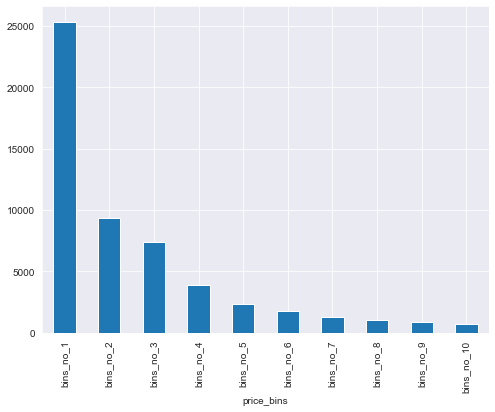

In [54]:
# let’s plot a bar plot that shows the frequency of prices in each bin.
dimond.groupby('price_bins')['price'].count().plot.bar()
plt.style.use('fivethirtyeight')
#The output shows that the price of most of the diamonds lies in the first bin or the first interval.
#da zamung ta show kawe 6 zmung sra der diamond dasy de 6 aghay price pa awal bins k raze

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,bins_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,bins_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,bins_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,bins_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,bins_no_1
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,bins_no_2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,bins_no_2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,bins_no_2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,bins_no_2
